### Teste técnico da área de Análise de Dados

Mais detalhes vide README.md

**Etapas da análise:**

1. Importação de bibliotecas
2. Leitura e pré-processamento dos dados
3. Análise exploratória geral
4. Métricas de Engajamento
5. Métricas de Desempenho
6. Padrões de Uso
7. Segmentações
8. Recomendações baseadas nos dados



In [20]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Configuração para exibir todas as colunas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.options.display.float_format = '{:.2f}'.format

In [21]:
# Leitura do arquivo CSV
df_raw = pd.read_csv("Dados/Dados.csv", encoding='latin1', sep=';')
df_raw.head()


,ID,Data,Hora,Região,Estudante,Curso,Feature,Nota
0,1,06/08/2023,08:28:21,Sudeste,Cintia Nogueira,Literatura,Simulados,"5,9"
1,2,05/08/2023,05:51:54,Sudeste,Caio Damasco,Física,Ebooks,X
2,3,07/08/2023,10:46:16,Sudeste,Caio Damasco,Física,Simulados,"2,45"
3,4,14/08/2023,22:44:25,Norte,Yuri Kepler,Física,Aulas Online,X
4,5,08/08/2023,00:41:16,Norte,Daniel Dalembert,Literatura,Aulas Online,X


In [ ]:
# Informações sobre o DataFrame
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         200 non-null    int64 
 1   Data       200 non-null    object
 2   Hora       200 non-null    object
 3   Região     200 non-null    object
 4   Estudante  200 non-null    object
 5   Curso      200 non-null    object
 6   Feature    200 non-null    object
 7   Nota       200 non-null    object
dtypes: int64(1), object(7)
memory usage: 12.6+ KB


In [24]:
df_raw.isnull().sum()

ID           0
Data         0
Hora         0
Região       0
Estudante    0
Curso        0
Feature      0
Nota         0
dtype: int64

In [26]:
# Fazendo uma copia do DataFrame
df = df_raw.copy()

# Substituindo vírgula por ponto e convertendo a coluna Nota
df["Nota"] = df["Nota"].str.replace(",", ".")
df["Nota"] = pd.to_numeric(df["Nota"], errors="coerce")

# Convertendo data e hora para um formato mais adequado
df["Data"] = pd.to_datetime(df["Data"], format="%d/%m/%Y")
df["Hora"] = pd.to_datetime(df["Hora"], format="%H:%M:%S").dt.time

# Criando novas colunas de dias da semana e hora do dia
df["Dia da Semana"] = df["Data"].dt.day_name()
df["Hora do Dia"] = df["Hora"].apply(lambda x: x.hour)

# Verificando o resultado
df.head()


,ID,Data,Hora,Região,Estudante,Curso,Feature,Nota,Dia da Semana,Hora do Dia
0,1,2023-08-06,08:28:21,Sudeste,Cintia Nogueira,Literatura,Simulados,5.90,Sunday,8
1,2,2023-08-05,05:51:54,Sudeste,Caio Damasco,Física,Ebooks,NaN,Saturday,5
2,3,2023-08-07,10:46:16,Sudeste,Caio Damasco,Física,Simulados,2.45,Monday,10
3,4,2023-08-14,22:44:25,Norte,Yuri Kepler,Física,Aulas Online,NaN,Monday,22
4,5,2023-08-08,00:41:16,Norte,Daniel Dalembert,Literatura,Aulas Online,NaN,Tuesday,0


In [ ]:
# Verificando dados estatísticos gerais do conjunto de dados
df.describe(include="all")

,ID,Data,Hora,Região,Estudante,Curso,Feature,Nota,Dia da Semana,Hora do Dia
count,200.00,200,200,200,200,200,200,93.00,200,200.00
unique,NaN,NaN,200,5,19,6,4,NaN,7,NaN
top,NaN,NaN,08:28:21,Norte,Yuri Kepler,Matemática,Aulas Online,NaN,Tuesday,NaN
freq,NaN,NaN,1,49,17,42,60,NaN,36,NaN
mean,100.50,2023-08-15 05:52:48,NaN,NaN,NaN,NaN,NaN,4.69,NaN,12.54
...,...,...,...,...,...,...,...,...,...,...
25%,50.75,2023-08-07 00:00:00,NaN,NaN,NaN,NaN,NaN,2.07,NaN,7.00
50%,100.50,2023-08-15 00:00:00,NaN,NaN,NaN,NaN,NaN,5.03,NaN,13.00
75%,150.25,2023-08-23 00:00:00,NaN,NaN,NaN,NaN,NaN,6.78,NaN,19.00
max,200.00,2023-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,9.90,NaN,23.00


#### Início da análise em busca de KPIs e Métricas relevantes

In [ ]:
# Contagem de acessos por estudante
acessos_aluno = df["Estudante"].value_counts().reset_index()
acessos_aluno.columns = ["Estudante", "Total de Acessos"]
acessos_aluno.head()


,Estudante,Total de Acessos
0,Yuri Kepler,17
1,Polyana Hermes,16
2,Daniel Dalembert,16
3,Hélio Jr,15
4,Sávio Pedrosa,14


In [ ]:
# Verificando a frequência média semanal com que cada aluno acessa o sistema
acessos_por_dia = df.groupby("Estudante")["Data"].nunique()
frequencia_semanal = acessos_por_dia / ((df["Data"].max() - df["Data"].min()).days / 7)
frequencia_semanal = frequencia_semanal.reset_index(name="Frequência média semanal")
frequencia_semanal.head()


,Estudante,Frequência média semanal
0,Ana Malu,2.33
1,Brunno Paiva,1.40
2,Caio Damasco,1.63
3,Cintia Nogueira,1.40
4,Daniel Dalembert,2.80


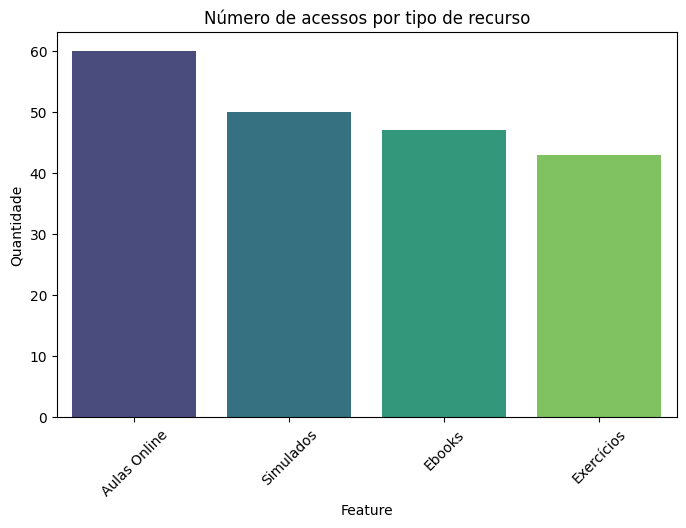

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Feature", order=df["Feature"].value_counts().index, palette="viridis")
plt.title("Número de acessos por tipo de recurso")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Contagem de estudantes por curso e região
pivot = pd.pivot_table(df, index="Curso", columns="Região", values="Estudante", aggfunc="count", fill_value=0)
pivot


Região,Centro Oeste,Nordeste,Norte,Sudeste,Sul
Curso,,,,,
Ciências da Computação,2,5,11,6,7
Engenharia Civil,4,7,7,7,7
Física,5,4,9,13,9
História,6,2,4,8,5
Literatura,6,6,7,5,6
Matemática,6,10,11,7,8


In [ ]:
# Média de notas por curso, recurso e região
df_notas = df.dropna(subset=["Nota"])

media_curso = df_notas.groupby("Curso")["Nota"].mean().sort_values(ascending=False)
media_recurso = df_notas.groupby("Feature")["Nota"].mean().sort_values(ascending=False)
media_regiao = df_notas.groupby("Região")["Nota"].mean().sort_values(ascending=False)

print("Média por Curso:")
print(media_curso)
print("\nMédia por Recurso:")
print(media_recurso)
print("\nMédia por Região:")
print(media_regiao)


Média por Curso:
Curso
Ciências da Computação   5.44
História                 5.08
Literatura               4.62
Física                   4.55
Engenharia Civil         4.47
Matemática               3.88
Name: Nota, dtype: float64

Média por Recurso:
Feature
Simulados    4.72
Exercícios   4.65
Name: Nota, dtype: float64

Média por Região:
Região
Sudeste        5.69
Norte          5.02
Centro Oeste   4.99
Nordeste       4.28
Sul            3.15
Name: Nota, dtype: float64


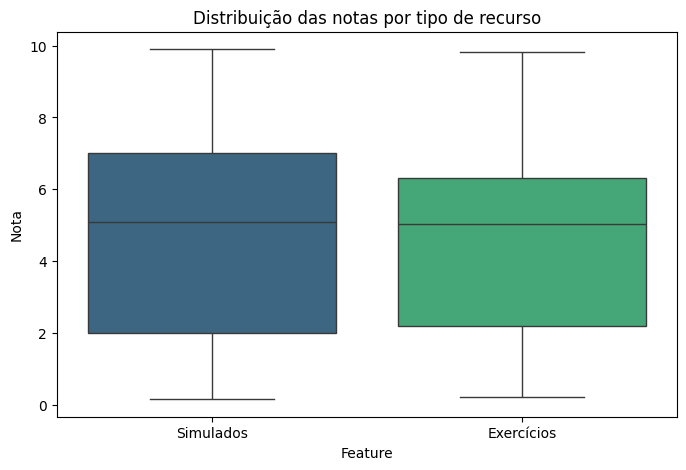

In [ ]:
# Boxplot das notas por recurso
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_notas, x="Feature", y="Nota", palette="viridis")
plt.title("Distribuição das notas por tipo de recurso")
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Porcentagem de interações sem nota
sem_nota = df["Nota"].isna().sum()
total = len(df)
percentual_sem_nota = (sem_nota / total) * 100

print(f"{percentual_sem_nota:.2f}% das interações não possuem nota (apenas acesso)")


53.50% das interações não possuem nota (acesso apenas)


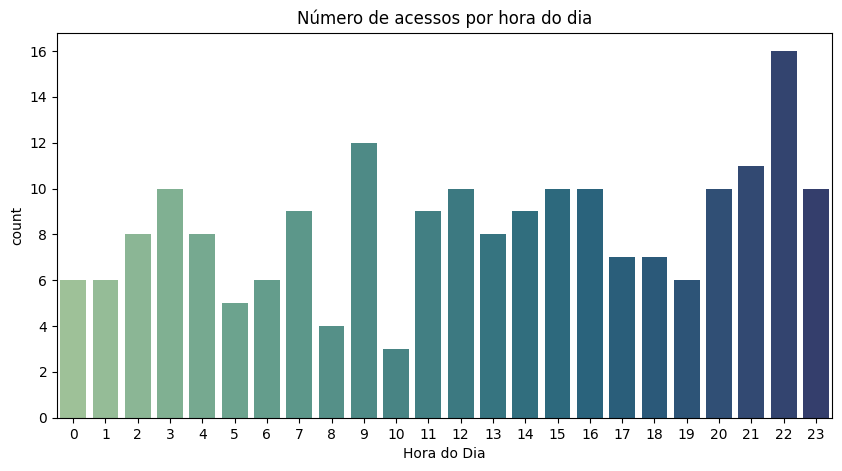

In [41]:
# Contagem de acessos por hora do dia (Horário de pico)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Hora do Dia", palette="crest")
plt.title("Número de acessos por hora do dia")
plt.show()


In [ ]:
# Contagem de acessos por recurso
df["Feature"].value_counts()

Feature
Aulas Online    60
Simulados       50
Ebooks          47
Exercícios      43
Name: count, dtype: int64

In [ ]:
# Contagem de acessos por curso (engajamento)
curso_engajamento = df["Curso"].value_counts().reset_index()
curso_engajamento.columns = ["Curso", "Total de Acessos"]
curso_engajamento.head(10)


,Curso,Total de Acessos
0,Matemática,42
1,Física,40
2,Engenharia Civil,32
3,Ciências da Computação,31
4,Literatura,30
5,História,25


In [ ]:
# Faixa de notas
df["Faixa de Nota"] = pd.cut(df["Nota"], bins=[0, 4, 7, 10], labels=["Baixa", "Média", "Alta"])
df[["Estudante", "Nota", "Faixa de Nota"]].dropna().head()


,Estudante,Nota,Faixa de Nota
0,Cintia Nogueira,5.90,Média
2,Caio Damasco,2.45,Baixa
5,Polyana Hermes,2.78,Baixa
9,Ana Malu,1.80,Baixa
11,Ana Malu,6.23,Média


In [46]:
# Contagem de acessos por recurso e região
segmento = df.groupby(["Região", "Feature"]).size().reset_index(name="Total de Acessos")
segmento.sort_values(by="Total de Acessos", ascending=False).head(10)

,Região,Feature,Total de Acessos
8,Norte,Aulas Online,16
13,Sudeste,Ebooks,15
11,Norte,Simulados,15
16,Sul,Aulas Online,15
14,Sudeste,Exercícios,12
12,Sudeste,Aulas Online,11
7,Nordeste,Simulados,11
17,Sul,Ebooks,11
4,Nordeste,Aulas Online,10
19,Sul,Simulados,10
